In [1]:
import pdb

In [2]:

import matplotlib.pyplot as plt
%matplotlib notebook



from pyipn import copy_template, Universe

# Start up

We first want to copy the template configuration to our local director so that we can edit it.


In [3]:
copy_template()

We can see how the config looks.

change template_config.yaml here:
/home/msinghart/.vevn/pyipn/lib/python3.5/site-packages/pyipn-0.1.0-py3.5.egg/pyipn/data/

In [4]:
!cat template_config.yaml

## Specify the GRB parameters

grb:

  # Location and distance (degrees and Mpc)
  ra: 0.
  dec: -10.
  distance: 100.

  # lightcurve
  K: 10. # intensity
  t_rise: 1. # rise time
  t_decay: 2. # decay time


# specify the detectors
# each entry is treated as the name of the detector
detectors:

  # name the detector
  det1:

    # it's location in GCRS
    ra: 10.
    dec: 0.
    altitude: 3000. # km
    time: '2010-01-01T00:00:00' # time of detection

    # Where the detector point in the sky
    pointing:
      ra: 10.
      dec: 30.

    # the total effective area
    effective_area: 1.


  # add more detectors!
  
  det2:

    ra: 180.
    dec: -10.
    altitude: 3000.
    time: '2010-01-01T00:00:00'
    
    pointing:
      ra: 10.
      dec: 30.

    effective_area: 1.

  det3:

    ra: 20.
    dec: 40.
    altitude: 15000.
    time: '2010-01-01T00:00:00'
    
    pointing:
      ra: 20.
      dec: 70.

    effective_area: 1.

    
  
    


# Make a Universe and blow up a GRB

We can load the configuration from the yaml file.

In [5]:
uni = Universe.from_yaml('template_config.yaml')

Set how long before and after the trigger time that you would like the light curve to last and create the data.

In [6]:
uni.explode_grb(tstart=-50,tstop=50)

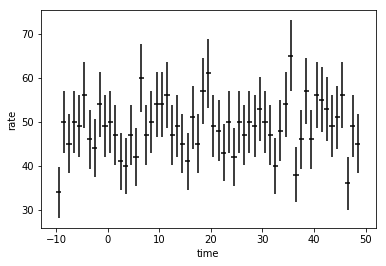

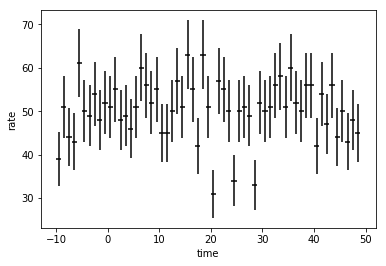

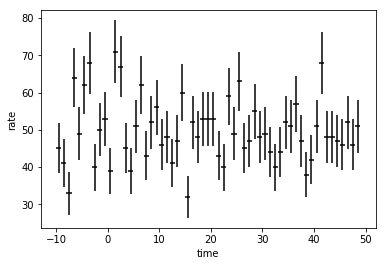

In [7]:
for det, lc in uni.light_curves.items():
    
    lc.display(-10,50,1.)
    

We can now view the light curves.

In [8]:
print(uni._time_differences)

[0.         0.01185391 0.0617845 ]


In [9]:
uni.calculate_annulus("det1", "det2")

(<Quantity [-0.99231667, -0.0874861 , -0.0874861 ] km>,
 <Quantity [ 3.22952878, -0.08759809] rad>,
 2.865211909544836)